### Предисловие
На этот раз ситуация следующая: Вы работаете в приложении по доставке готовых продуктов. К Вам пришел коллега с результатами двух тестов:
* в первом тестировали разрешение фотографии блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные;
* во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть - новый.

Коллега пришел к Вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача - помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

### Задания
1. Выбрать метод, который предположительно подойдет в первом вопросе.
2. Проверить, являются ли дисперсии внутри групп гомогенными.
3. Провести тест на нормальность распределения.
4. Сравнить средние в представленных группах.
5. Используя критерий Тьюки определить, между какими группами есть статистически значимые различия.
6. Принять решение: какие графики необходимо использовать.
7. Выбрать метод для второго теста.
8. ВУзуализировать распределение событий для контрольной и тестовой групп.
9. Посмотреть на описательные статистики событий в разбивке по группе и по сегменту пользователя.
10. Выбрать формулу для модели, провести тест.

### Описание данных
* id - идентификатор клиента в эксперименте
* group - в каком разрешении показывались картинки (A - прямоугольные 16:9, B - квадратные, C - прямоугольные 12:4)
* events - сколько блюд суммарно было заказано за период

In [1]:
import pandas as pd
from scipy.stats import levene, shapiro
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# global variables
BASE_URL = 'https://getfile.dokpub.com/yandex/get/'

In [3]:
# read data
url_data1 = 'https://disk.yandex.ru/d/iRcyB5PS8JB1lw'
data = pd.read_csv(BASE_URL + url_data1)

In [4]:
data.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
data_group_A = data.loc[data['group']=='A', 'events']
data_group_B = data.loc[data['group']=='B', 'events']
data_group_C = data.loc[data['group']=='C', 'events']

In [6]:
'''Проверка выборок на гомогенность дисперсий
Нулевая гипотеза (H0) говорит о гомогенности дисперсий.
Альтернативная гипотеза (Н1) позволит с вероятностью 5% отклонить нулевую гипотезу.

Т.к. нас интересует равенство дисперсий, то в данном случае нам интересна нулевая гипотеза.
'''

levene(data_group_A, data_group_B, data_group_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Показатель `p-value` получился больше 0.05. Можно сделать вывод, что у нас недостаточно оснований отклонить нулевую гипотезу в пользу альтернативной. Отсюда следует, что во всех 3-х выборках дисперсия значимо не отличается.

In [7]:
data['group'].value_counts()

A    10000
B    10000
C    10000
Name: group, dtype: int64

In [8]:
'''Проверка выборок на нормальность
Нулевая гипотеза (H0) говорит о соответсвии нашего распределения нормальному.
Альтернативная гипотеза (H1) говорит о несоответствии нашего распределения нормальному.

Как и с гомогенностью дисперсий, нас интересует нулевая гипотеза, чтобы наши выборки были 
распределены нормально.
'''

print('group A: ', shapiro(data_group_A))
print('group B: ', shapiro(data_group_B))
print('group C: ', shapiro(data_group_C))

group A:  ShapiroResult(statistic=0.9989334344863892, pvalue=3.915170964319259e-06)
group B:  ShapiroResult(statistic=0.9990164041519165, pvalue=1.0542044037720188e-05)
group C:  ShapiroResult(statistic=0.9989203214645386, pvalue=3.3573114706086926e-06)


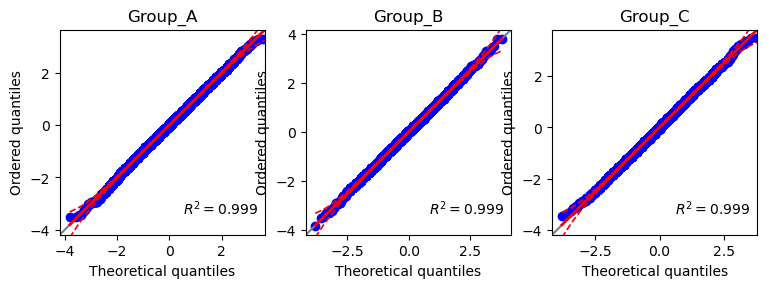

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4))

ax1 = pg.qqplot(data_group_A, dist='norm', ax=ax1)
ax1.set_title('Group_A')
ax2 = pg.qqplot(data_group_B, dist='norm', ax=ax2)
ax2.set_title('Group_B')
ax3 = pg.qqplot(data_group_C, dist='norm', ax=ax3)
ax3.set_title('Group_C')
plt.show()

Можно обратить внимание, что все выборки имеют нормальное распределение (критерий Shapiro-Wilk). Подтверждением чему является график `qqplot`.

In [10]:
'''Дисперсионный анализ
Нулевая гипотеза (H0) между группами отсутствуют значимые различия.
Альтернативная гипотеза (H1) хотя бы между двумя какими-то группами имеются значимые различия.
'''

pg.anova(data=data, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


Анализируя результаты дисперсионного анализа можно сделать вывод, что между какими-то группами имеются различия. Этому свидетельствует показатель `p-value` равный 0.0.

In [11]:
pg.pairwise_tukey(data=data, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


Т.к. соблюдается условие гомогенности дисперсий, то можно использовать критерий Тьюки для определения различий между группами. Показатель `p-value` показывает, что между всеми группами имеются значимые различия.

Чтобы выбрать картинки, которые необходимо использовать, можно посмотреть, где среднее значение выше, значит эта группа экспериментируемых имеет наибольший эффект.

Также можно построить график `catplot`.

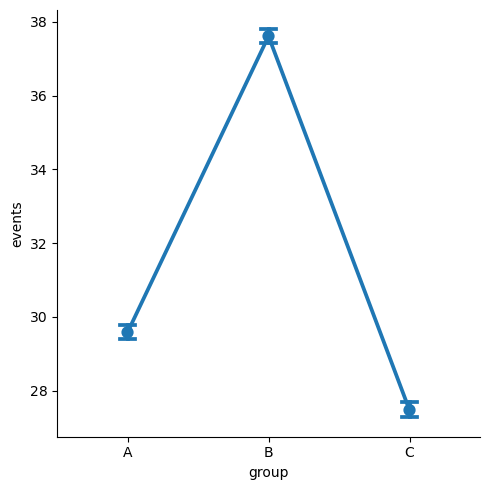

In [12]:
sns.catplot(data=data, x='group', y='events', kind='point', capsize=.1)
plt.show()

По графику явно наблюдается преимущество у группы `B`. Отсюда можно сделать вывод, что эффект от события больше в случае если фотографии блюд в приложении будут иметь квадратную форму.

### Описание данных
* id - идентификатор клиента в эксперименте
* segment - сегмент (high/low)
* group - вид кнопки (control - старая версия, test - новая версия)
* events - сколько блюд суммарно было заказано за период

In [13]:
# read data
url_data1 = 'https://disk.yandex.ru/d/NqeZSGmq5O3iFw'
data = pd.read_csv(BASE_URL + url_data1)

In [14]:
data.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


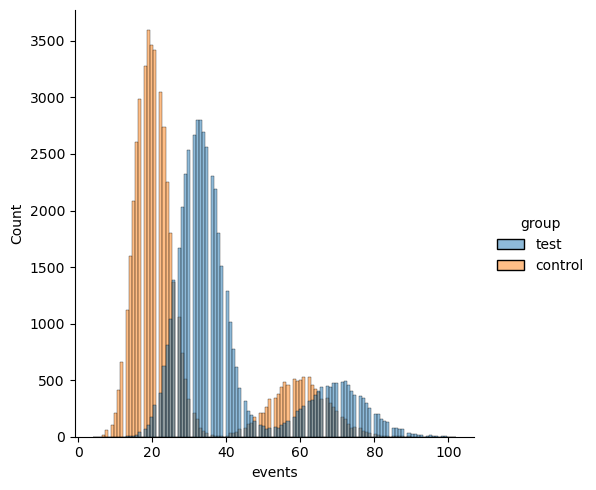

In [21]:
# посмотрим, как распределены наши данные
sns.displot(data=data, x='events', hue='group')

In [27]:
data.groupby(['group', 'segment']).events.describe()[['mean', '50%', 'std']] \
    .rename(columns={'50%': 'median'})

mean  median       std
group   segment                             
control high     59.970800    60.0  7.805347
        low      20.031575    20.0  4.473576
test    high     69.938500    70.0  8.403974
        low      33.025925    33.0  5.720845

In [28]:
pg.anova(data=data, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864120,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377486,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [31]:
data = data.assign(combination=data['group']+' / '+data['segment'])

In [32]:
pg.pairwise_tukey(data=data, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,7.521612
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.228989
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.350026
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-9.091140
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.530414
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,5.814008


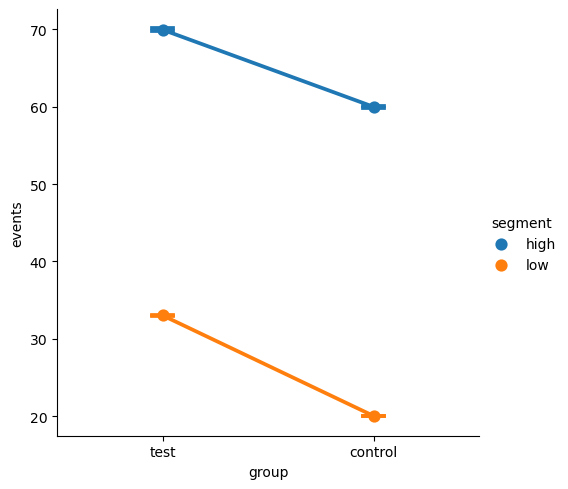

In [33]:
sns.catplot(data=data, x='group', y='events', hue='segment', kind='point', capsize=.1)
plt.show()